# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar a base de dados
dados_demo = pd.read_csv('demo01.csv')

In [4]:
dados_demo.info

<bound method DataFrame.info of       sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0        M                Y               Y           0               Working   
1        F                N               Y           0  Commercial associate   
2        F                N               Y           0  Commercial associate   
3        M                Y               Y           0               Working   
4        F                Y               N           0               Working   
...    ...              ...             ...         ...                   ...   
16645    F                N               Y           0               Working   
16646    F                N               Y           0  Commercial associate   
16647    M                Y               Y           0               Working   
16648    M                Y               Y           0               Working   
16649    F                N               Y           0             Pensioner

In [5]:
dados_demo.describe()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
count,16650.000000,16650.000000,16650.000000,16650.0,16650.000000,16650.000000,16650.000000,16650.000000
mean,0.433153,44.319513,-161.416446,1.0,0.225225,0.295676,0.088889,2.211892
std,0.739395,11.228837,376.843912,0.0,0.417743,0.456360,0.284592,0.903755
min,0.000000,22.030137,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,34.873973,1.183562,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,43.493151,4.691781,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,53.410959,9.088356,1.0,0.000000,1.000000,0.000000,3.000000
max,14.000000,68.909589,42.906849,1.0,1.000000,1.000000,1.000000,15.000000


In [6]:
dados_demo.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [7]:
# Calcular a quantidade de valores ausentes por variável
valores_ausentes_por_variavel = dados_demo.isnull().sum()

# Exibir os resultados
print("Número de valores ausentes por variável:")
print(valores_ausentes_por_variavel)

Número de valores ausentes por variável:
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64


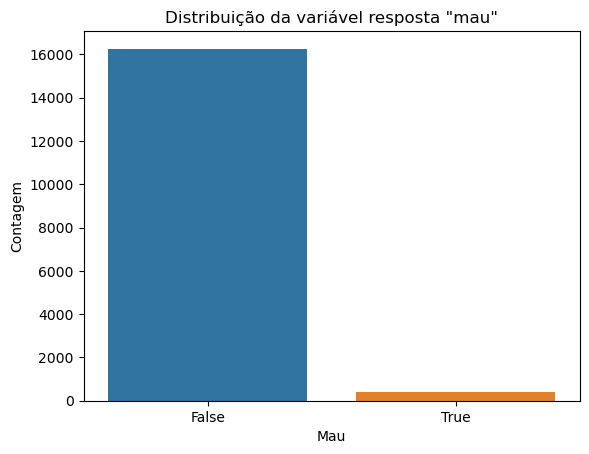

In [9]:
# Criar gráfico de contagem para variável booleana "mau"
sns.countplot(x='mau', data=dados_demo)

# Adicionar rótulos e título
plt.title('Distribuição da variável resposta "mau"')
plt.xlabel('Mau')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [10]:
## 1)
# Criar um dicionário com os nomes das variáveis e seus tipos de dados
variaveis = list(dados_demo.columns)
tipos_dados = [str(dados_demo[var].dtype) for var in variaveis]

# Criar um DataFrame
info_variaveis = pd.DataFrame({
    'Variável': variaveis,
    'Tipo de Dados': tipos_dados
})

# Exibir o DataFrame
print(info_variaveis)

                 Variável Tipo de Dados
0                    sexo        object
1        posse_de_veiculo        object
2         posse_de_imovel        object
3              qtd_filhos         int64
4              tipo_renda        object
5                educacao        object
6            estado_civil        object
7         tipo_residencia        object
8                   idade       float64
9           tempo_emprego       float64
10         possui_celular         int64
11  possui_fone_comercial         int64
12            possui_fone         int64
13           possui_email         int64
14  qt_pessoas_residencia       float64
15                    mau          bool


In [13]:
## 2)
# 1. Inicie uma lista vazia
qtd_categorias_list = []

# 2. Faça um for ao longo dos nomes das variáveis
for var in variaveis:
    # 3. Conte o número de categorias dessa variável
    qtd_categorias = len(dados_demo[var].unique())
    
    # 4. Acumule essa informação na lista criada em 1.
    qtd_categorias_list.append(qtd_categorias)

# 5. Atribua a lista à nossa variável
info_variaveis['qtd_categorias'] = qtd_categorias_list

# Exibir o DataFrame
print(info_variaveis)

                 Variável Tipo de Dados  qtd_categorias
0                    sexo        object               2
1        posse_de_veiculo        object               2
2         posse_de_imovel        object               2
3              qtd_filhos         int64               8
4              tipo_renda        object               5
5                educacao        object               5
6            estado_civil        object               5
7         tipo_residencia        object               6
8                   idade       float64            5298
9           tempo_emprego       float64            3005
10         possui_celular         int64               1
11  possui_fone_comercial         int64               2
12            possui_fone         int64               2
13           possui_email         int64               2
14  qt_pessoas_residencia       float64               9
15                    mau          bool               2


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [14]:
# 1. Selecionar apenas as variáveis numéricas e categóricas
dados_demo_numeric = dados_demo.select_dtypes(include=['number'])
dados_demo_categorical = dados_demo.select_dtypes(include=['object'])

# 2. Criar variáveis dummy para as variáveis categóricas
dados_demo_categorical_dummies = pd.get_dummies(dados_demo_categorical, drop_first=True)

# 3. Concatenar os DataFrames
dados_processados = pd.concat([dados_demo_numeric, dados_demo_categorical_dummies], axis=1)

# Exibir o DataFrame resultante
print(dados_processados)

       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

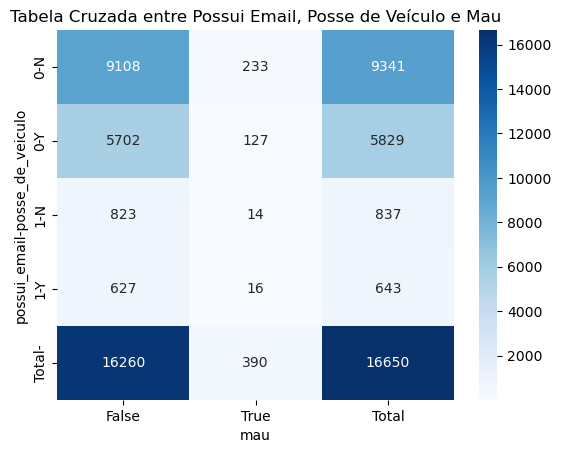

In [17]:
# Criação da tabela cruzada
tabela_cruzada = pd.crosstab([dados_demo['possui_email'], dados_demo['posse_de_veiculo']], dados_demo['mau'], margins=True, margins_name='Total')

# Plotagem do gráfico
sns.heatmap(tabela_cruzada, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title('Tabela Cruzada entre Possui Email, Posse de Veículo e Mau')
plt.show()

In [ ]:
Posee email da mais informacoes

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [18]:
dados_demo.to_csv('Demofinal.csv', index=False)